# Title: Topic Modelling and Search with Top2Vec

#### Members' Names:
                        Bhupinder Singh
                        Richa Sharma

####  Emails:
                        bhupinder1.singh@ryerson.ca
                        richa4.sharma@ryerson.ca 



# Introduction:

#### Problem Description:

Topic Modeling is used for discovering latent semantic structure, usually referred to as topics, in a large collection of documents.
Traditional topic modeling methods are Latent Dirichlet Allocation (LDA) and Probabilistic Latent Semantic Analysis (PLSA), which have several weaknesses despite their popularity.
Top2Vec, the proposed model in the research paper that we studied, addresses these weaknesses and finds topics that are significantly more informative and representative of the corpus than the ones generated by traditional models. 

#### Context of the Problem:

Organizing, searching and summarizing huge corpora of text is a significant problem statement in NLP. Topic Modeling is a type of statistical modeling that is used to discover the hidden semantic structure present in documents. These discovered topics can then be used to find high level summaries of a large collection of documents, search for documents of interest, and group similar documents together.  
  
In simple terms, Topic Modeling is a method for unsupervised classification of documents, like clustering on numeric data, which finds some natural groups of items (topics), even when we are not sure what we are looking for. The most widely used topic modeling method is Latent Dirichlet Allocation (LDA). The big idea behind LDA is the following: each document can be described by a distribution of topics and each topic can be described by a distribution of words. The aim of LDA is to find topics a document belongs to, based on the words in it.  
  
LDA and PLSA discretize the continuous topic space into an assumed number of topics (say *t*), and then model documents as mixtures of those *t* topics. This is one of the greatest weakness of these models, as the number of topics *t* or the way to estimate it is rarely known, especially for very large or unfamiliar datasets.  
  
Additionally, each topic produced by these methods is a distribution of word probabilities. As such, the highest probability words in a topic are usually words such as *the*, *and*, *it* and other common words in the language. These common words, also called stop-words, often need to be filtered out in order to make topics interpretable, and extract the informative topic words. Finding the set of stop-words that must be removed is not a trivial problem since it is both language and corpus specific.  
  
Also, these methods use bag-of-words (BOW) representation of documents as input which ignores the ordering and semantics of words. They also employ techniques like Stemming and Lemmatization, which do not recognize the similarity of words like *big* and *large*, which do not share a word stem.  
  
This brings us to the problem statement: how to address and overcome these weaknesses and build a better model for discovering topics. The approaches and solutions offered by *Top2Vec* are discussed and presented in subsequent sections. 


#### Limitation About other Approaches:

As discussed in detail in the Context section above, traditional topic modeling methods LDA & PLSA require the number of topics to be known, custom stop-word lists, stemming, and lemmatization, and rely on a bag-of-words representation of documents, which is less than ideal.  

#### Solution:
Top2Vec uses a Distributed Representations of Topics, employing the ***doc2vec*** model and its Distributed Bag of Words (DBOW) architecture, to learn jointly embedded document and word vectors. Following this, it performs Dimensionality Reduction, using the ***UMAP*** algorithm (Uniform Manifold Approximation and Projection) to help find dense areas. Clustering of documents is then undertaken using ***HDBSCAN*** (Hierarchical Density-Based Spatial Clustering of Applications with Noise). For each dense area, a numeric representation of the topic (***topic vector***) is then obtained by taking the arithmetic mean of all the document vectors in the same cluster. And finally, each document is assigned a topic number based on the nearest topic vector to its document vector.


# Background


| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Mikolov et al. [1] | They presented several enhancements to the original Skip-gram model and introduced Negative Sampling | Large news articles dataset (an internal Google dataset with one billion words pre-processed to vocabulary size 692K ) | This paper would later form a basis of the Doc2Vec model and eventually Top2Vec.
| Mikolov et al. [2] | They introduced *Paragraph Vector*,  an unsupervised framework that learns continuous distributed vector representations for pieces of texts. | Stanford sentiment treebank dataset (Socher et al., 2013b) and IMDB dataset (Maas et al., 2011) | Paragraph Vector can be computationally expensive
| Dimo Angelov [3] | They introduced top2vec, which leverages joint document and word semantic embedding to find topic vectors, and does not require does not require assumed number of topics, stop-word lists, stemming or lemmatization | 20 News Groups Dataset, Yahoo Answers Dataset |


# Methodology
  
1. Top2Vec starts off by learning jointly embedded document and word vectors, using the doc2vec model and its Distributed Bag of Words (DBOW) architecture, essentially converting each document and each unique word to a numeric representation, *document vector* and *word vector* respectively.   
2. In the jointly embedded document and word vector space, the *semantic space* so to speak, documents and words are represented as positions as is seen in the image above. Here, the word vectors that are nearest to a document vector, are the most semantically descriptive of the document’s topic. In the semantic space, a dense area of documents can be interpreted as an area of highly similar documents. This dense area of documents is indicative of an underlying topic that is common to the documents.  See image below. The researchers found 40 to 400 training epochs to be a good range for this task.
![Alternate text ](Figure_1.png "Figure 1: An example of a semantic space. The purple points are documents and the green points are words. Words are closest to documents they best represent and similar documents are close together.")  
  
3. In the high-dimensional semantic space, the document vectors are very sparse, which in turn makes it difficult to find dense clusters as it is computationally expensive. Thus, dimensionality reduction is performed on the document vectors with the UMAP algorithm (Uniform Manifold Approximation and Projection for Dimension Reduction). See image below for an interesting visualisation.  
![Alternate text ](Figure_2.png "Figure 2: 300 dimensional document vectors from the 20 news groups dataset that are embedded into 2 dimensions using UMAP.")  

4. The goal of density based clustering is to find areas of highly similar documents in the semantic space, which indicate an underlying topic. This is performed on the UMAP reduced document vectors. HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) is used to find the dense areas of document vectors. It assigns a label to each dense cluster of document vectors and assigns a noise  label to all document vectors that are not in a dense cluster. The dense areas of identified document vectors will be used to calculate the topic vectors. Documents that are classified as noise can be seen as not being descriptive of a prominent topic. See image below.  
![Alternate text ](Figure_3.png "Figure 3: Each colored area of points is a dense area of documents identified by HDBSCAN, red points are documents HDBSCAN has labeled as noise.") 

5. Topic vectors are now calculated. The centroid, i.e. the arithmetic mean of all the document vectors in the same dense cluster of those vectors is calculated. This centroid is the topic vector which is most representative of the the dense area of documents it was calculated from. The words that are closest to this topic vector are the words that best describe it semantically. The main assumption behind top2vec is that *the number of dense areas of document vectors equals the number of prominent topics.* See image below for a visualization of the topic vectors.
![Alternate text ](Figure_4.png "Figure 4: The topic vector is the centroid of the dense are of documents identified by HDBSCAN, which are the purple points. The outliers identified by HDBSCAN are not used to calculate the centroid.") 

6. The word vectors that are closest to a topic vector are those that are most representative of it semantically. These are topic words, summarize the common topic of the documents in the dense area. See image below.
![Alternate text ](Figure_5.png "Figure 5: The topic words are the nearest word vectors to the topic vector.") 

# Implementation


## Topic Modelling on the CORD-19 and Search with Top2Vec

#### COVID-19 Open Research Dataset Challenge (CORD-19)

#### The Top2Vec model has been trained on the [Kaggle COVID-19 Dataset](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) with the 'deep-learn' parameter and has been demonstrated here.  
#### See *[Top2Vec_Training_&_Application.ipynb]* for detailed implementation.

In [1]:
#!pip install top2vec==1.0.6

# Note: The latest version of Top2Vec is 1.0.24. However, in the process of running the code,
# I ran into many errors with numerous versions of the library.
# I then installed every version of Top2Vec backwards. 
# 1.0.6 is the version that is running correctly without any errors.

In [2]:
import numpy as np 
import pandas as pd 
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display
from top2vec import Top2Vec

### Load Pre-trained Model and Pre-processed Data

The Top2Vec model was trained with the 'deep-learn' speed parameter and takes a long time to train. 'fast-learn' or 'learn' parameters can also be used.

#### Data is available [here.](https://www.kaggle.com/dangelov/covid19top2vec)

#### 1. Load pre-trained Top2Vec model 

In [3]:
top2vec = Top2Vec.load("R:/Ryerson/Term 2 [Winter 2021]/DS8008/Kaggle CORD-19 Pre-Processed Dataset/covid19_deep_learn_top2vec")

#### 2. Load pre-processed papers

In [4]:
papers_df = pd.read_feather("R:/Ryerson/Term 2 [Winter 2021]/DS8008/Kaggle CORD-19 Pre-Processed Dataset/covid19_papers_processed.feather")

### Use Top2Vec for Semantic Search

##### Get Number of Topics that Top2Vec has found for this Data

In [9]:
print("Number of Topics: ", top2vec.get_num_topics())

Number of Topics:  399


---

##### Get Topics  
This will return the topics in decreasing size.

    Returns:

        topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.

        word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.

        topic_nums: The unique index of every topic will be returned.

In [25]:
topic_words, word_scores, topic_nums = top2vec.get_topics(3)

print("Topic Words: ", topic_words)
print("Word Scores: ", word_scores)
print("Unique Index of Every Topic: ", topic_nums)

Topic Words:  [['della', 'dei', 'anche', 'delle', 'alle', 'attività', 'più', 'nel', 'nella', 'alla', 'degli', 'popolazione', 'hanno', 'questi', 'questo', 'essere', 'dell', 'sono', 'particolare', 'nelle', 'rischio', 'loro', 'livello', 'inoltre', 'ambito', 'questa', 'quindi', 'contesto', 'infatti', 'attraverso', 'valutazione', 'nell', 'strumenti', 'agli', 'pertanto', 'ancora', 'sulle', 'secondo', 'formazione', 'salute', 'tutti', 'sanitarie', 'tuttavia', 'sulla', 'gestione', 'dalla', 'ruolo', 'approccio', 'sull', 'lavoro'], ['una', 'como', 'la', 'pacientes', 'durante', 'caso', 'del', 'uso', 'un', 'entre', 'por', 'que', 'con', 'para', 'causa', 'parte', 'deve', 'ou', 'forma', 'en', 'importante', 'presente', 'le', 'terapia', 'dato', 'oms', 'numero', 'tipo', 'campo', 'alta', 'grave', 'fase', 'tema', 'dos', 'punto', 'problema', 'totale', 'de', 'ambulatorio', 'modo', 'processo', 'el', 'casi', 'sociale', 'produzione', 'periodo', 'solo', 'grado', 'mediante', 'globale'], ['une', 'dans', 'pour', 'q

---

##### Search Topics  
We are going to search for topics most similar to *medicine*.

    Returns:

        topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.

        word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.

        topic_scores: For each topic the cosine similarity to the search keywords will be returned.

        topic_nums: The unique index of every topic will be returned.

In [26]:
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["medicine"], num_topics=3)

print("Topic Words: ", topic_words)
print("Word Scores: ", word_scores)
print("Topic Scores: ", topic_scores)
print("Unique Index of Every Topic: ", topic_nums)

Topic Words:  [['herbs', 'herb', 'flavonoids', 'herbal', 'medicinal', 'radix', 'phytochemical', 'folk', 'phenolic', 'oils', 'polyphenols', 'glabra', 'bioactive', 'bupleuri', 'rhizoma', 'saponins', 'polyphenolic', 'alkaloids', 'cassiae', 'bark', 'constituents', 'baicalensis', 'glycyrrhiza', 'lignans', 'flavonoid', 'sinensis', 'phytochemicals', 'pharmacopoeia', 'bioactivities', 'roots', 'terpenoids', 'ingredient', 'phenolics', 'tannins', 'licorice', 'glycosides', 'tea', 'decoction', 'ailments', 'polyphenol', 'amentoflavone', 'polysaccharides', 'tcm', 'antioxidant', 'ginseng', 'aerial', 'alkaloid', 'uralensis', 'echinacea', 'catechin'], ['jenner', 'himself', 'variolation', 'him', 'book', 'famous', 'smallpox', 'edward', 'nobel', 'philosophical', 'president', 'william', 'scientist', 'centuries', 'century', 'he', 'war', 'prize', 'court', 'plague', 'my', 'professor', 'wrote', 'wife', 'congress', 'story', 'mike', 'everyone', 'greek', 'modern', 'father', 'twentieth', 'humanity', 'revolution', '

---

##### Generate Word Clouds  
Using a topic number you can generate a word cloud. We are going to generate word clouds for the top 5 most similar topics to our medicine topic search from above.

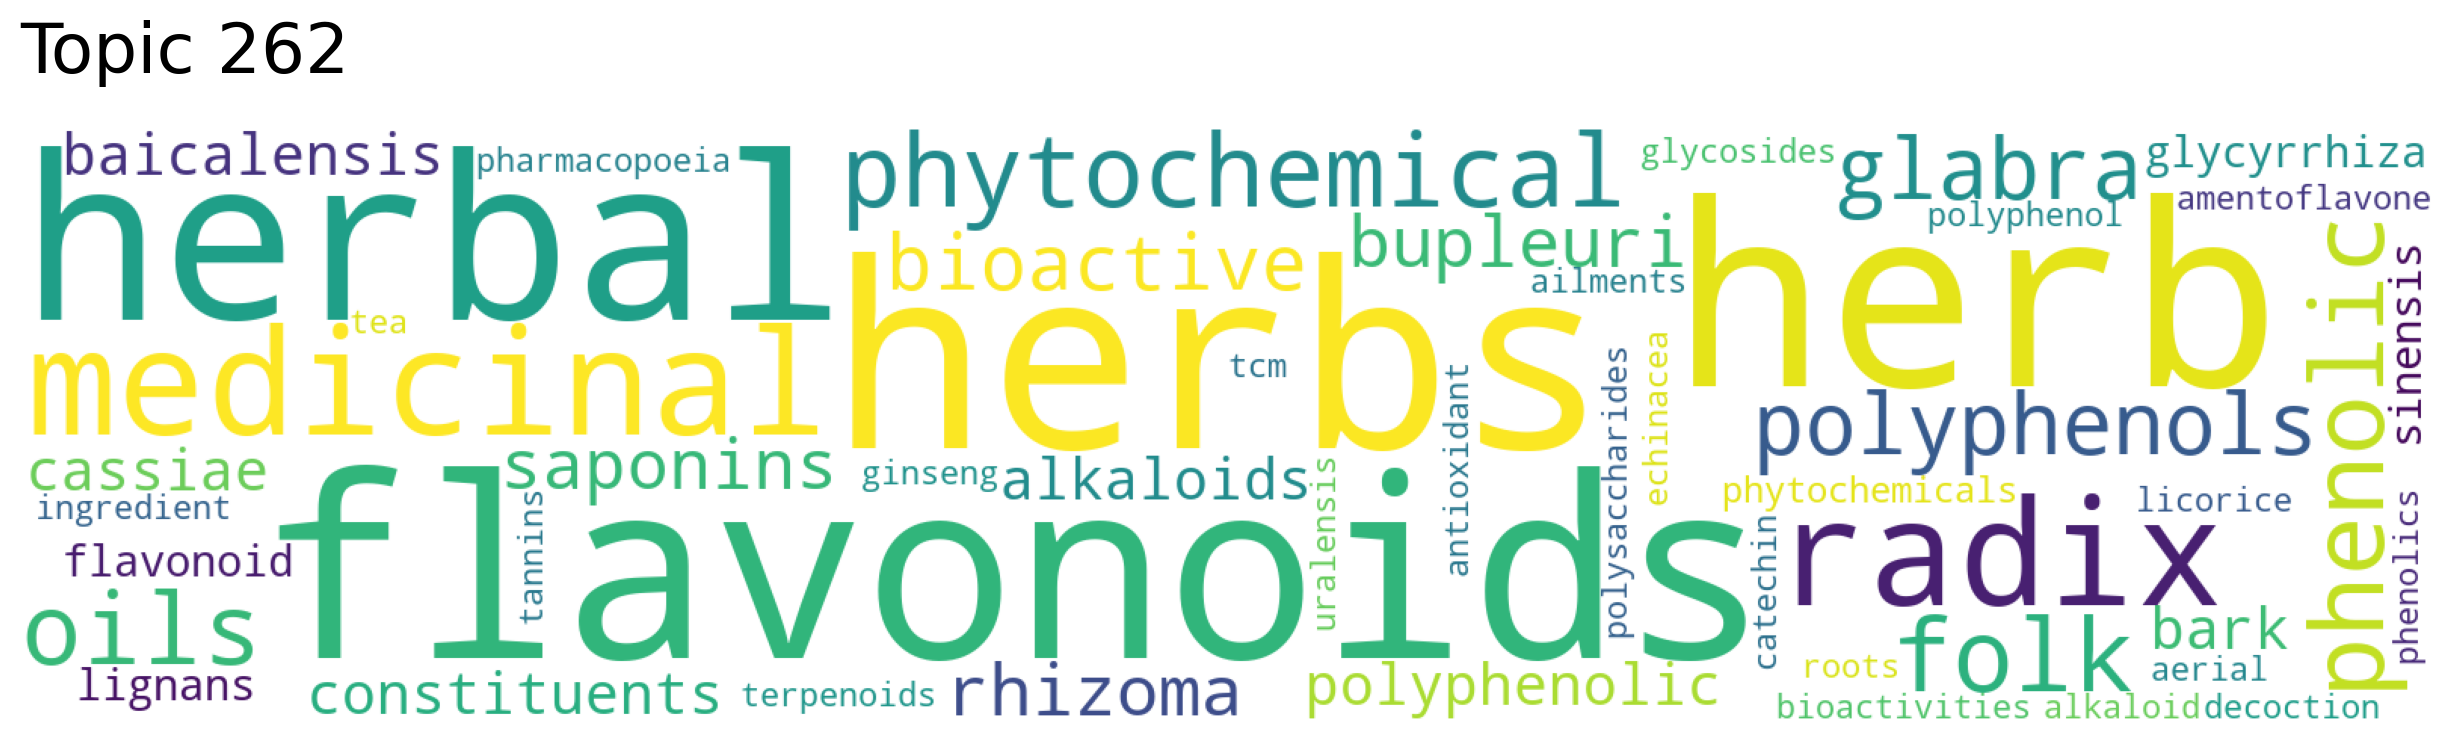

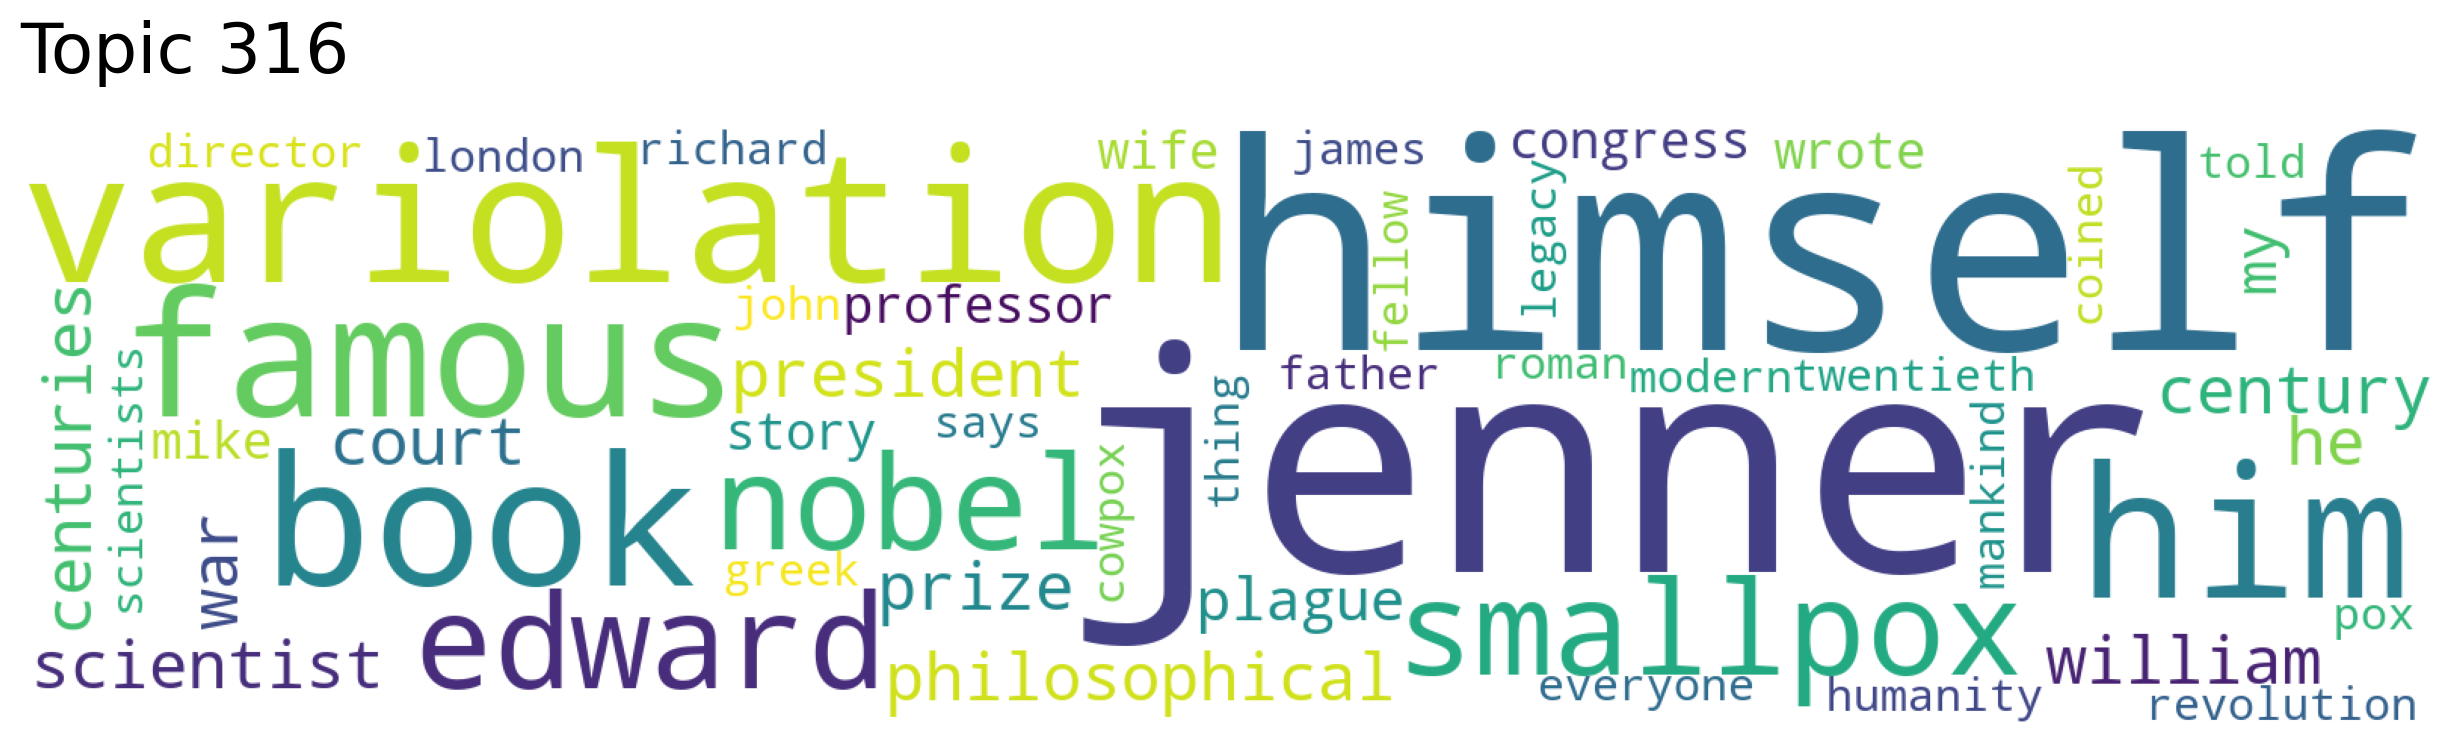

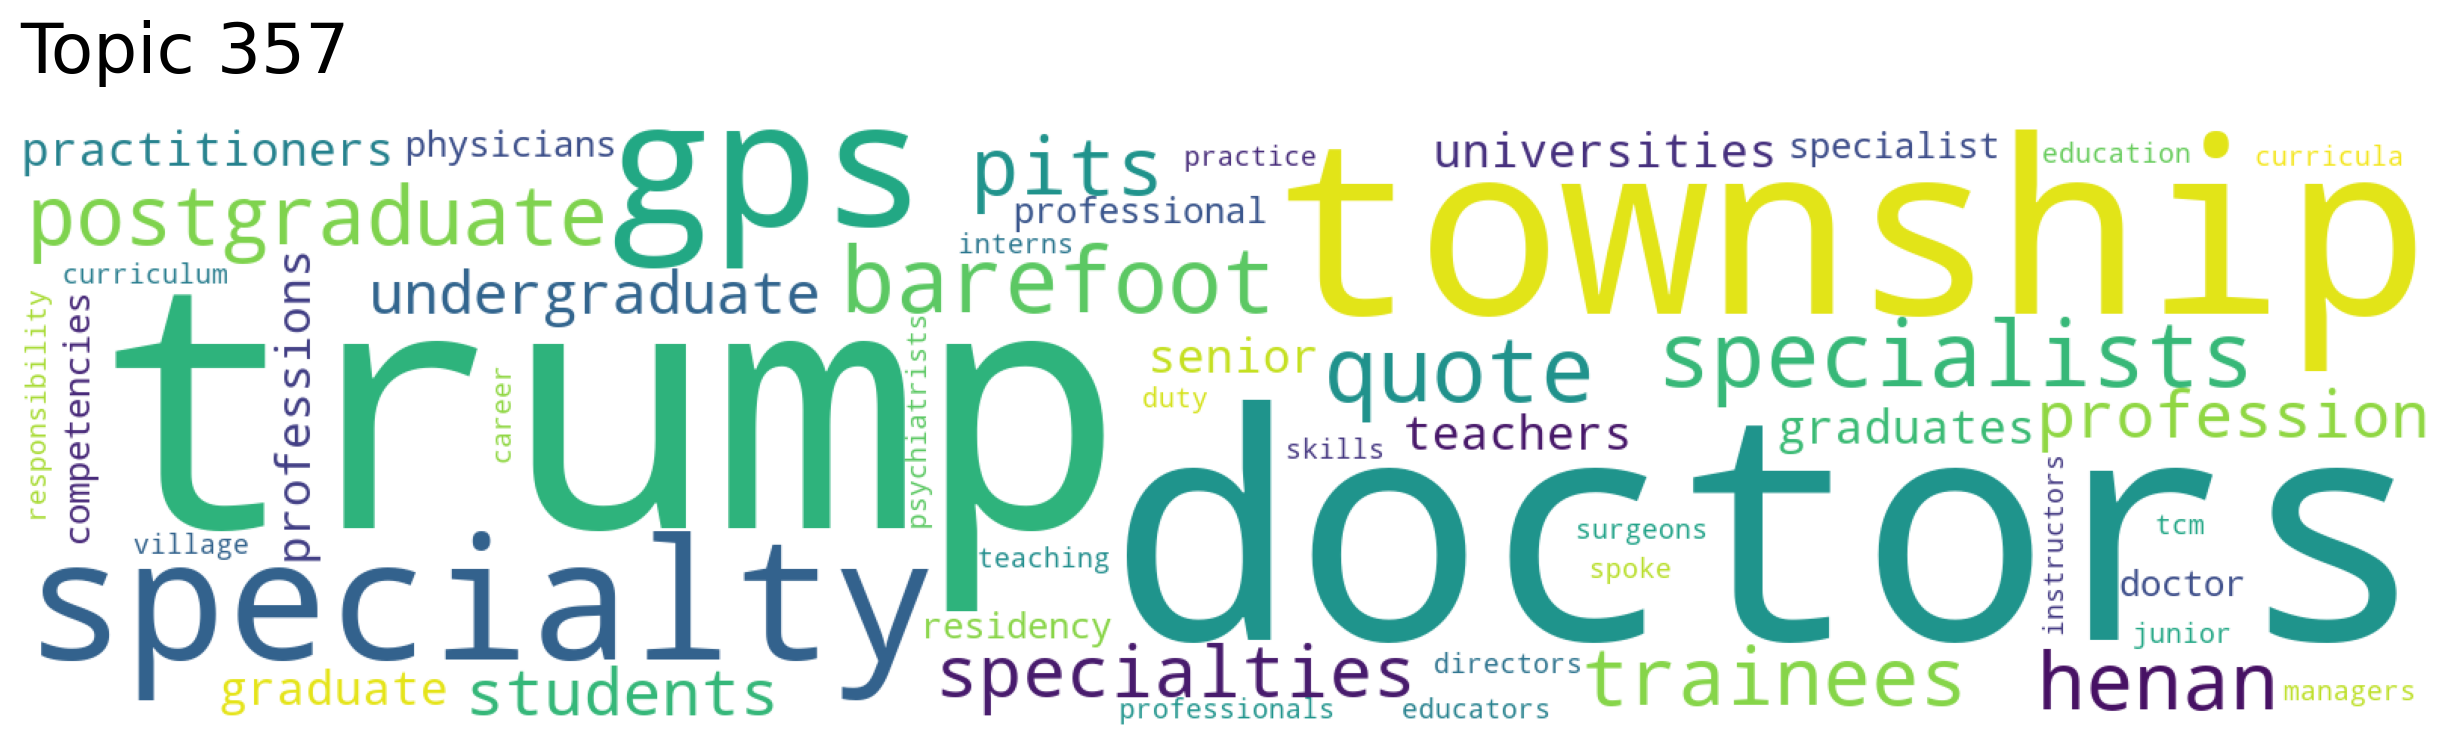

In [27]:
for topic in topic_nums:
    top2vec.generate_topic_wordcloud(topic)

---

##### Search Documents by Topic  
We are going to search by topic 48, a topic that appears to be about science.  

    Returns:

        documents: The documents in a list, the most similar are first.

        doc_scores: Semantic similarity of document to topic. The cosine similarity of the document and topic vector.

        doc_ids: Unique ids of documents. If ids were not given, the index of document in the original corpus.

In [23]:
documents, document_scores, document_ids = top2vec.search_documents_by_topic(topic_num=48, num_docs=2)

print("Documents: ", documents)
print("Document Scores: ", document_scores)
print("Document IDs: ", document_ids)

Documents:  ['The control of Leishmania chagasi (syn. Leishmania infantum) infection in dogs is essential to stop the current spread of zoonotic visceral leishmaniasis. Therefore, a vaccine against VL would be an important tool for controlling CVL and would dramatically decrease anxiety regarding L. chagasi infection in humans [18, 47] . In this sense, the establishment of biomarkers of immunogenicity is considered critical in the rational approach for analyzing candidate vaccines against CVL, and it contributes to identifying the pattern of immune response in dogs and the search for vaccine candidates against CVL [48, 49] . For this reason, in this work, the immunogenicity and protective effects of the "LbSapSal" vaccination in dogs were investigated using levels of NO and cytokines and evaluations related to the spleen parasite load. Furthermore, the addition of sand fly saliva extract to vector-based vaccines can enhance the ability of the host to control or block Leishmania infecti

---

##### Similar Keywords  

Search for words similar to *space*.  

In [28]:
words, word_scores = top2vec.similar_words(keywords=["space"], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

space 1.0
dimensional 0.6007
spatial 0.529
spaces 0.5252
distance 0.5223
dimensions 0.5157
along 0.5007
location 0.481
inside 0.4793
locations 0.466
coordinates 0.4581
near 0.4579
resolution 0.4533
distances 0.4511
built 0.4507
geometrical 0.4498
area 0.4425
allows 0.4413
dynamic 0.4407
feature 0.4398


---

# Conclusion and Future Direction

One of the salient features that attracted us while learning this topic was the captivating visualization of the results. This model presents a significant computational breakthrough in that the traditional long-running concepts are completely turned on their head. This model completely shortcuts the use of BOW representation, an assumed number of topics, and other things like stemming and lemmatization. The potential applications for this model can be huge and widespread, for example once the computational resources progress, it can be implemented in smartphones too, vastly improving processing power. In addition to text mining, top2vec can find applications in other domains too.

# References:

[1]:  Tomas Mikolov, Ilya Sutskever, Kai Chen, Greg Corrado, Jeffrey Dean, Distributed Representations of Words and Phrases and their Compositionality, Google, 2013

[2]:  Tomas Mikolov, Quoc Le, Distributed Representations of Sentences and Documents, Google, 2014

[3]:  Dimo Angelov, Top2Vec: Distributed Representations of Topics, 2020
